# Visualizations for Topic Models with *tmtoolkit*

This uses a topic model generated from a tiny subset of the Reuters data included in the [lda package](http://pythonhosted.org/lda/).

In [2]:
# load complete model
import six   # for loading the right model according to the Python version
from tmtoolkit import lda_utils

py3suffix = '.py3' if six.PY3 else ''
data = lda_utils.common.load_ldamodel_from_pickle('data/tiny_model_reuters_5_topics%s.pickle' % py3suffix)

model = data['model']
vocab = data['vocab']
doc_labels = data ['doc_labels']

## Topics as Word Clouds

In [5]:
topic_clouds = lda_utils.visualize.generate_wordclouds_for_topic_words(model.topic_word_,
                                                                       vocab,
                                                                       top_n=20)
topic_clouds.keys()

dict_keys(['topic_2', 'topic_4', 'topic_5', 'topic_3', 'topic_1'])

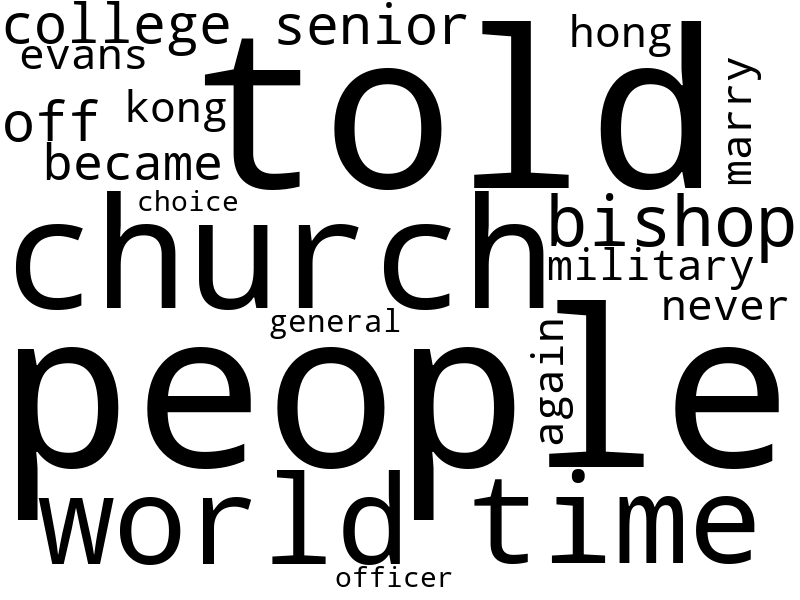

In [6]:
topic_clouds['topic_1']

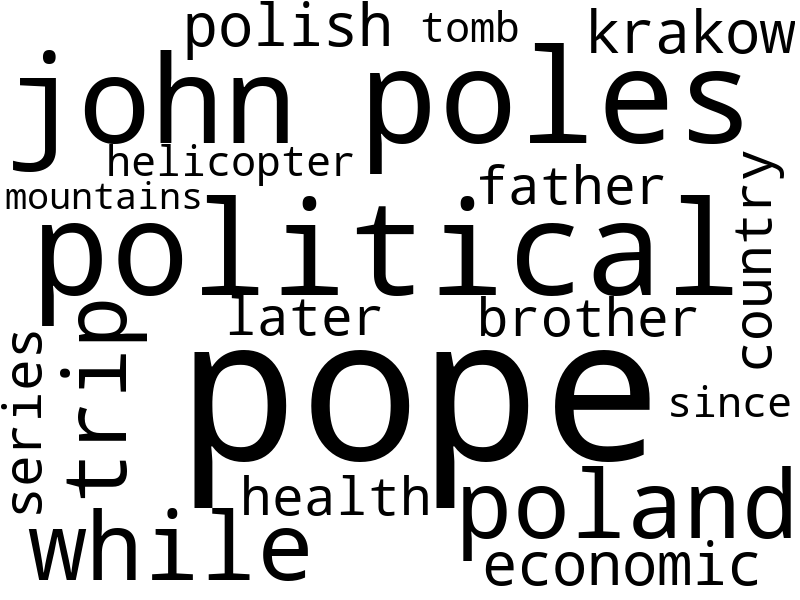

In [8]:
topic_clouds['topic_3']

## Document-topic clouds

In [10]:
doc_clouds = lda_utils.visualize.generate_wordclouds_for_document_topics(model.doc_topic_,
                                                                         doc_labels,
                                                                         top_n=5)
doc_clouds.keys()

dict_keys(["152 UK: FEATURE - Duke's reputation sinks 60 years after abdication. LONDON 1996-12-11", "2 INDIA: Mother Teresa's condition said still unstable. CALCUTTA 1996-08-23", '73 UK: Runaway Scottish bishop to marry lover. GLASGOW, Scotland 1996-10-08', '168 UK: Britain to review law after Fred West film plan. LONDON 1997-01-01', "337 POLAND: Pope spends moments of silence at parents' grave. KRAKOW, Poland 1997-06-09", '248 INDIA: Mother Teresa successor vote soon - church official. CALCUTTA 1997-03-04', "293 UK: China's HK General perfect choice, says tutor. LONDON 1997-04-22", '330 POLAND: Pope takes helicopter trip over beloved mountains. ZAKOPANE, Poland 1997-06-05', '140 UK: Papers show Duke of Windsor was royal loose cannon. LONDON 1996-12-03', '163 ISRAEL: Israel takes shine off Christmas in Bethlehem. BETHLEHEM, West Bank 1996-12-23'])

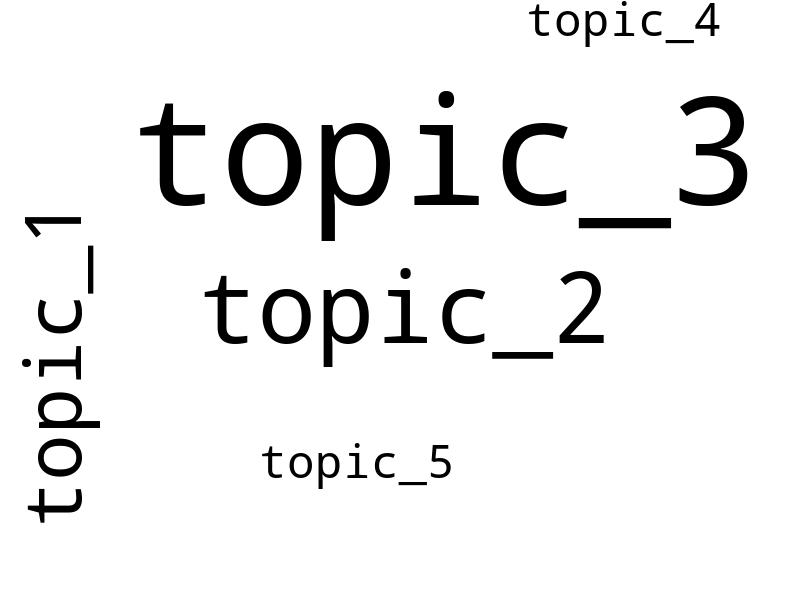

In [11]:
doc_clouds['330 POLAND: Pope takes helicopter trip over beloved mountains. ZAKOPANE, Poland 1997-06-05']

## Saving wordclouds as files

In [17]:
import os

output_dir = '/tmp/wordclouds_nbtest'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

lda_utils.visualize.write_wordclouds_to_folder(topic_clouds, output_dir)

print('files were saved to directory: %s' % output_dir)

files were saved to directory: /tmp/wordclouds_nbtest
